# Motivation

## Data sets

### SFFD - Calls to Service

The main data set behind the analysis is the San Fransisco Fire Department calls to service dataset from the city of San Francisco. The dataset includes all fire units reponses to calls. Each record includes the call number, incident number, address, unit identifier, call type and disposition. All relevent time intervals are also included in the dataset. Because the dataset is based on responses, and since most calls involve multiple units, there are multiple records for each call number. We decided to focus on the period from 2012 to 2017. The dataset can be downloaded from this [website](https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3/data)

As can be seen in the link above the dataset contains 34 variables. Here is a description of the subset we used:

- **Call Number** : A unique 9-digit number assigned by the 911 Dispatch Center (DEM) to this call. These number are used for both Police and Fire calls.
- **Call type** :  type of the call e.g medical incident, outside fire, water rescue......
- **Call Type Group** : Call types are divided into four main groups: Fire, Alarm, Potential Life Threatening and Non Life Threatening.
- **Dispatch DtTm** : Date and time when the unit takes off from the station.
- **Received DtTm** : Date and time when the call is received at the 911 Dispatch Center.
- **On Scene DtTm** : Date and time the unit records arriving to the location of the incident.
- **Call Final Disposition** : Disposition of the call (Code). For example TH2: Transport to Hospital - Code 2, FIR: Resolved by Fire Department .
- **Location** : Location of incident (note: address and location generalized to mid-block of street, intersection or nearest call box location, to protect caller privacy).
- **Neighborhoods** : Neighborhood District associated with the call latitude and longitude.
- **StationArea** - : The station of the responding unit.
- **Battalion** - :Battalion of the responding unit.

### Neighborhood Data 

In the visualization we wanted the user to see more information about each neighborhood. The American Census Bureau releases community surveys regularly with very detailed information and a lot of parameters. We decided working through that data-set was out of the scope of this project. The neighborhood's information seen in the website was extracted from this [website](http://www.city-data.com/nbmaps/neigh-San-Francisco-California.html). The csv file can be found in this repository under the folder csv_files under the name neighborhood_firecalls_statistic. The data set contains the following attributes

- The **name of the neighborhood**
- **Population density** - People per square mile
- **Area** - in square miles
- **Median household income**
- Ratio of people **below poverty level**
- Ratio of **english speaking persons**
- Ratio of **foreign born residents**


This information is only suppose to be complimentary to the analysis of SFFD Calls To Service data-set and City-Data.com provides no guarantee of the accuracy or timeliness of any information on the site. Those with serious interest in the demographics of San Fransisco or any other city or place in the United States should take a look at the [American Community Survey](https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t) 


### Fire Stations 

We also wanted to visualize the location of all fire stations in San Francisco. To accomplish that we needed to create our own data set with the longitude and latitude of each fire station. The data was taken from this [website](http://sf-fire.org/fire-station-locations). The csv file can be found in this repository under the folder csv_files under the name fire_stations.csv. The data set contains the the following attributes:

- The **number** of the fire station
- The **address** of the fire station 
- The **longitude** of the fire station 
- The **latitude** of the fire station 

### The Goal

Most people understand that fire departments play a vital role in their communities. The response time of the fire department can make the difference between life and death, it is vital for all communities that the response time is minimized as much as possible. Fire fighters in many places not only do their best to prevent the loss of lives due to fire, their tasks can vary from rescuing victims from hazardous conditions to providing emergency medical services. This is no different for the SFFD, in fact, that is the biggest part of their jobs. In the article [The Importance of a Firefighter](http://work.chron.com/importance-firefighter-19431.html) they found that firefighters respond to, on a national level in the U.S., almost 20 million medical emergencies compared to approximately 1.4 million fires.

We chose this data set because we wanted to explore the difference in service between the neighborhoods of San Francisco, specifically the fire department's response time, and to set up an interactive visualization of our findings. We wanted to find out if there was any difference in response time between neighborhoods, if there exists a geological patterns in the average response time in San Francisco, if the response time was time dependent and if there was a difference between different types of calls e.g fire, alarm, life threatening, non life threatening. We added two additional data sets to set the result into perspective by including some information about the neighborhoods and the locations of the fire stations.

Our machine learning goals are two-fold. First we want to see if we can extract enough information out of the SFFD - Calls for Service data-set to predict the response time in each neighborhood each hour in the day. Secondly we want to see if we can predict if the workload within the hour in 24 hours will be below average.

# Basic stats


## Data cleaning and preprocessing

- Because the data set is based on responses, and since most calls involve multiple units, there are multiple records for each call number. Before doing the analysis we decided to group the data by call number and focus on the data associated with the first responding unit.

- We defined the **response time** or **time-to-arrival** as the difference in time from when the call was registered, seen in the attribute Received DtTm, and the time when the first responding unit showed up at the scene, seen in the On Scene DtTm attribute.

- Quite a few of the Dispatched, On Scene timestamps and transport/hospital timstamps were timestamped on the 25th of April 2016, irregardless of day, month or year of other timestamps. This ment that you could have units dispatched in 2012 and arriving on scene 25th of April 2016. Due to this we removed all rows containing relevant timestamps, stamped at that date.

- We derived two new variables from the data-sets.
    - **Direct distance**. We used the haversine distance to calculate the direct distance between the station responding to the call and the location the unit has to travel to. We used the station locations in the fire station data-set and the locations in the Calls-to-Service dataset.
    - **Number of station dispatches when call is received**. We measure three different windows of station dispatches, the number of dispatches in the last hour, the last 24 hours and the 24 hours before that. We use the difference from the average to account for the natural variance within the day.

- We exclude the Non Life-Threatening from the Machine Learning and the visual comparison of neighborhoods as the responding unit behaves differently. 


## Pre analysis

#### Basic stats for the Calls for Service data set from 1 Januar 2012 to 1 Januar 2017:
 - Size = 592,5 MB 
 - Number of rows = 1423564
 - Number of calls = 649354
 - Number of variables = 34
 
In the pre analysing phase of this project we spent a lot of time figuring out what information was relevant and what could be used to accomplish our goal. In the following section we will only go through small part of the analysis. We encourage a interested reader to click on the notebook's link here down below to further investigate and read about our analysis. 

-  [Basic stats](pre_analysis_Basic_stats.ipynb)
-  [Heat maps](pre_analysis_heatmap.ipynb)
-  [Wrangling data into different data-sets](https://github.com/gretarg09/Dtu-SocialDataAnalysis-SFFireDepartment/blob/master/Notebook/Data%20Wrangling.ipynb)
-  [Machine Learning Explorations](https://github.com/gretarg09/Dtu-SocialDataAnalysis-SFFireDepartment/blob/master/Notebook/Machine%20Learning%20Explorations.ipynb)
-  [Neighborhood statistic](data_hood_statistic.ipynb)
-  [Fire stations location](data_firestations_locations.ipynb)

First things first, we need to read in the data, the same data wrangling can be found in the notebook above.

In [1]:
# lets start by getting the data
import csv
import math
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from datetime import datetime
from operator import itemgetter
# Dataset url:
# https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3

data = []

hour_seconds = 3600
stationDispatches = {}
station24HrDispatches = {}
station48to24HrDispatches = {}

def second_difference(end,start):
    #'09/05/2014 03:33:20 AM' ->    %p
    start_sec = datetime.strptime(start, '%m/%d/%Y %I:%M:%S %p')
    if len(end) > 0:
        end_sec = datetime.strptime(end, '%m/%d/%Y %I:%M:%S %p')
        difference =(end_sec-start_sec).total_seconds()
        if start_sec.year != 2016 or start_sec.month != 4 or start_sec.day != 25:
            if end_sec.year != 2016 or end_sec.month != 4 or end_sec.day != 25:
                if difference >= 0.0:
                    return int(difference)
    return None
    
with open("../../Fire_Department_Calls_for_Service_2012-2016.csv", "rb") as csvfile:
    reader = csv.DictReader(csvfile,delimiter=",")
    for row in sorted(reader, key=lambda x:datetime.strptime(x["Dispatch DtTm"], '%m/%d/%Y %I:%M:%S %p')):
        CallDateSplit = row["Call Date"].split('/')
        CallDate = CallDateSplit[2]+'-'+CallDateSplit[0]+"-"+CallDateSplit[1]
        if CallDateSplit[2] == '2017':
            continue
        initiateToEntry = second_difference(row['Entry DtTm'],row['Received DtTm'])
        entryToDispatch = second_difference(row['Dispatch DtTm'],row['Entry DtTm'])
        dispatchToArrival = second_difference(row['On Scene DtTm'],row['Dispatch DtTm'])
        if initiateToEntry is None or entryToDispatch is None or dispatchToArrival is None:
            continue
        ReceivedDtTm = datetime.strptime(row["Received DtTm"], '%m/%d/%Y %I:%M:%S %p') # Date and time of call is received at the 911 Dispatch Center.
        DispatchDtTm = datetime.strptime(row["Dispatch DtTm"], '%m/%d/%Y %I:%M:%S %p') # Date and time of call is received at the 911 Dispatch Center.
        OnSceneDtTm = datetime.strptime(row["On Scene DtTm"], '%m/%d/%Y %I:%M:%S %p') # Date and time the unit records arriving to the location of the incident
        CallFinalDisposition = row["Call Final Disposition"]
        if row["Station Area"] == '' or row["Station Area"] == 'F3':
            continue
        StationArea = int(row["Station Area"])
        if StationArea not in stationDispatches:
                stationDispatches[StationArea] = []
        if StationArea not in station24HrDispatches:
                station24HrDispatches[StationArea] = []
        if StationArea not in station48to24HrDispatches:
                station48to24HrDispatches[StationArea] = []
        stationDispatches[StationArea].append(DispatchDtTm)
        while (DispatchDtTm - stationDispatches[StationArea][0]).total_seconds() > hour_seconds:
            stationDispatches[StationArea].pop(0)
        station24HrDispatches[StationArea].append(DispatchDtTm)
        while (DispatchDtTm - station24HrDispatches[StationArea][0]).total_seconds() > hour_seconds*24:
            station24HrDispatches[StationArea].pop(0)
        station48to24HrDispatches[StationArea].append(DispatchDtTm)
        while (DispatchDtTm - station48to24HrDispatches[StationArea][0]).total_seconds() > hour_seconds*48:
            station48to24HrDispatches[StationArea].pop(0)
        Box = -1
        if row['Box'] is not None and len(row['Box']) > 0 and 'AI' not in row['Box']:
            Box = int(row['Box'])
        data.append({
            "CallNumber":row["Call Number"],
            "CallType":row["Call Type"],
            "CallDate":CallDate,
            "ReceivedDtTm":ReceivedDtTm,
            "DispatchDtTm":DispatchDtTm,
            "OnSceneDtTm":OnSceneDtTm,
            "InitiateToEntry":initiateToEntry,
            "EntryToDispatch":entryToDispatch,
            "DispatchToArrival":dispatchToArrival,
            "Box":Box,
            "CallFinalDisposition":CallFinalDisposition,
            "StationArea":StationArea,
            "FinalPriority":int(row["Final Priority"]),
            "CallTypeGroup":row["Call Type Group"], #Call types are divided into four main groups: Fire, Alarm, Potential Life Threatening and Non Life Threatening., 
            "UnitType":row["Unit Type"],
            "UnitId":row["Unit ID"],
            "Battalion":int(row['Battalion'][1:]),
            "NeighborhoodDistrict":row["Neighborhood  District"],
            "Location":row["Location"],
            "StationDispatches":len(stationDispatches[StationArea]),
            "Station24HrDispatches":len(station24HrDispatches[StationArea]),
            "Station48to24HrDispatches":len([x for x in station48to24HrDispatches[StationArea] if 
                 (DispatchDtTm - station48to24HrDispatches[StationArea][0]).total_seconds() >= hour_seconds*24])
        })


In [2]:
import json
import cytoolz.curried as tlz
firestations = {}
with open('./data/fire_station_data.json') as f:    
    firestations = tlz.groupby(lambda x:x['station'],json.loads(f.read()))

In [3]:
# Author: Wayne Dyck
import math

def haversine(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

def getlatlonpair(location):
    return [float(location.strip("()").split(",")[0]), 
            float(location.strip("()").split(",")[1])]

In [4]:
# Multiple units can be called out for each call therefore multiple lines can be created for each call.
# We decided to group the data by call number and extract the relevant data.
import cytoolz.curried as tlz
import io
from operator import itemgetter
data_grouped = tlz.groupby(lambda x: x['CallNumber'],data)
for d in data_grouped:
    temp = {
        'CallType': "",
        'CallTypeGroup': "",
        'ReceivedHour': -1,
        'ReceivedYear': -1,
        'frTimeToArrival': float("inf"),
        'frUnitId': -1,
        'frUnitType': -1,
        'NeighborhoodDistrict': "",
        'Battalion':-1,
        'Lat': None,
        'Lon': None,
        'Weekend':False,
        'FinalPriority': -1,
        'CallFinalDisposition': "",
        'StationArea': -1,
        'DirectDistance': -1,
        'NbrhoodDispatches': -1,
        'BattalionDispatches': -1,
        'StationDispatches': -1,
        'Station24HrDispatches': -1,
        'Station48to24HrDispatches': -1,
        'Box':-1
    }
    for line in data_grouped[d]:
        timeToArrival = line['InitiateToEntry']+line['EntryToDispatch']+line['DispatchToArrival']
        if temp['frTimeToArrival'] > timeToArrival:
            temp['frTimeToArrival'] = timeToArrival
            temp['frUnitType'] = line['UnitType']
            temp['frUnitId'] = line['UnitId']
            temp['StationDispatches'] = line['StationDispatches']
            temp['Battalion'] = line['Battalion']
            temp['NeighborhoodDistrict'] = line['NeighborhoodDistrict']
            temp['Lat'],temp['Lon'] = getlatlonpair(line['Location']) 
            temp['FinalPriority'] = line['FinalPriority']
            temp['CallFinalDisposition'] = line['CallFinalDisposition']
            temp['CallDate'] = line['CallDate']
            temp['StationArea'] = line['StationArea']
            if line['StationArea'] in [47,94]:
                continue
            temp['DirectDistance'] = haversine((temp['Lat'],temp['Lon']),
                                               (firestations[str(temp['StationArea'])][0]['latitude'],
                                               firestations[str(temp['StationArea'])][0]['longitude']))
            temp['CallType'] = line['CallType']
            temp['CallTypeGroup'] = line['CallTypeGroup']
            temp['ReceivedHour'] = line['ReceivedDtTm'].hour
            temp['ReceivedYear'] = line['ReceivedDtTm'].year
            temp['Box'] = line['Box']
            temp['Station24HrDispatches'] = line['Station24HrDispatches']
            temp['Station48to24HrDispatches'] = line['Station48to24HrDispatches']
    data_grouped[d] = temp
#data_grouped = sorted(data_grouped.values(), key=itemgetter('CallDate','NeighborhoodDistrict'))

#### Total number of calls in each neighborhood

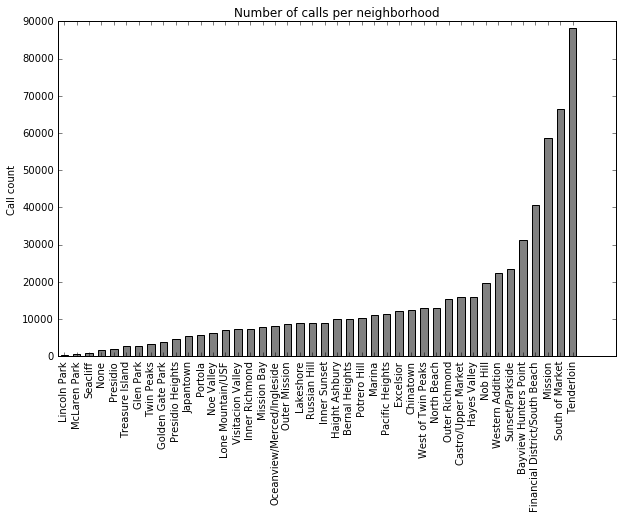

In [5]:
import csv
import math
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
%matplotlib inline

neigborhoodDistrict_count = Counter([line["NeighborhoodDistrict"] for line in data_grouped.values()])
neigborhoodDistrict_count = sorted(neigborhoodDistrict_count.items(), key=lambda i: i[1])

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
x = [key for key,_ in neigborhoodDistrict_count] 
y = [value for _,value in neigborhoodDistrict_count] 

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
plt.xticks(rotation=90)
plt.title("Number of calls per neighborhood")
plt.ylabel("Call count")
plt.show()

#### Total number of calls per call type groups

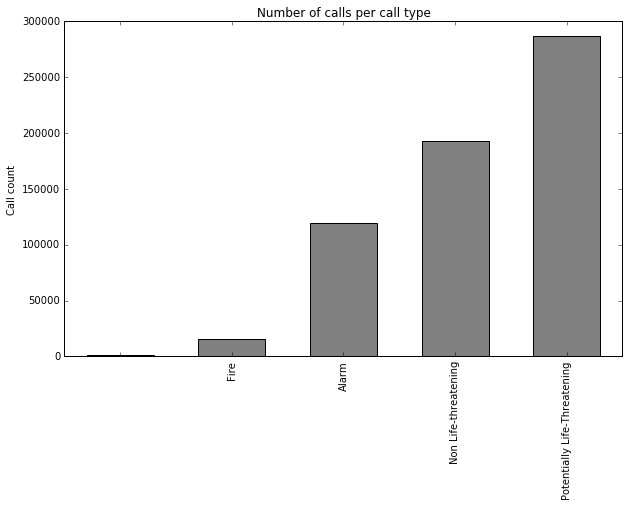

In [6]:
calltypesGroup_count = Counter([line["CallTypeGroup"] for line in data_grouped.values()])
calltypesGroup_count = sorted(calltypesGroup_count.items(), key=lambda i: i[1])

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
x = [key for key,_ in calltypesGroup_count] 
y = [value for _,value in calltypesGroup_count] 

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
plt.xticks(rotation=90)
plt.title("Number of calls per call type")
plt.ylabel("Call count")
plt.show()

####  Total number of calls for each hour of the day

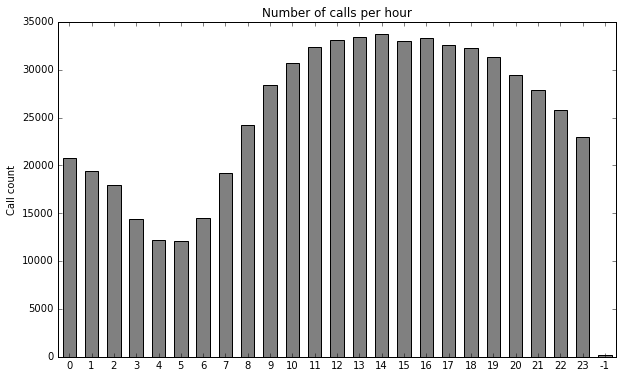

In [7]:
from datetime import datetime

numberOfCalls_perHour =  Counter([line["ReceivedHour"] for line in data_grouped.values()]).items()
x = [key for key,_ in numberOfCalls_perHour] 
y = [value for _,value in numberOfCalls_perHour] 

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
plt.title("Number of calls per hour")
plt.ylabel("Call count")
plt.show()

### Number of calls per call type

The most commonly occurring call type:  [('Medical Incident', 454524)]
The least commonly occuring call type:  ('Train / Rail Fire', 1)


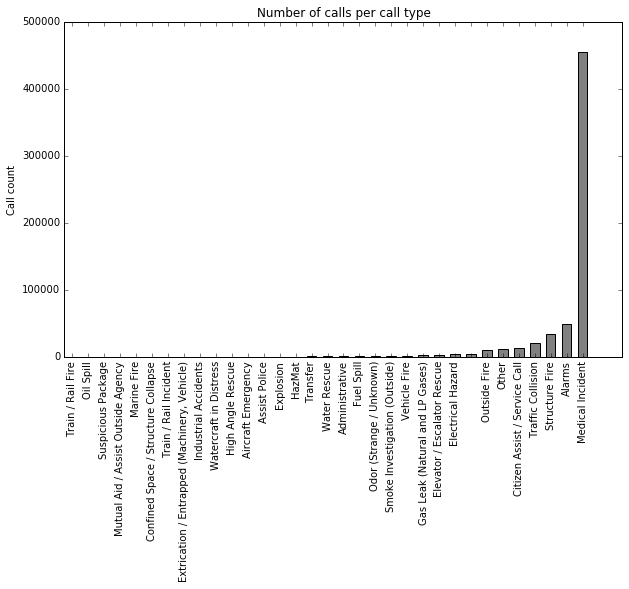

In [8]:
calltypes_count = Counter([line["CallType"] for line in data_grouped.values()])
print "The most commonly occurring call type: ", calltypes_count.most_common(1)
print "The least commonly occuring call type: ", calltypes_count.most_common()[-1]
calltypes_count = sorted(calltypes_count.items(), key=lambda i: i[1])

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
x = [key for key,_ in calltypes_count] 
y = [value for _,value in calltypes_count] 

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
plt.xticks(rotation=90)
plt.title("Number of calls per call type")
plt.ylabel("Call count")
plt.show()

### Number of calls per batallion

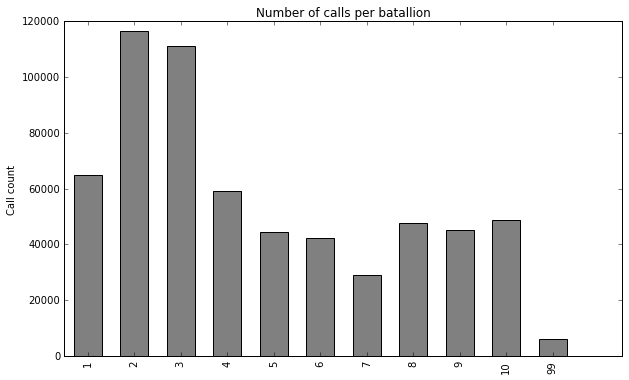

In [10]:
numberOfCalls_perYear = sorted(Counter([line["Battalion"] for line in data_grouped.values()]).items())
x = [key for key,_ in numberOfCalls_perYear] 
y = [value for _,value in numberOfCalls_perYear] 

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x, rotation=90)
plt.title("Number of calls per batallion")
plt.ylabel("Call count")
plt.show()

### Response time vs. various categorical variables

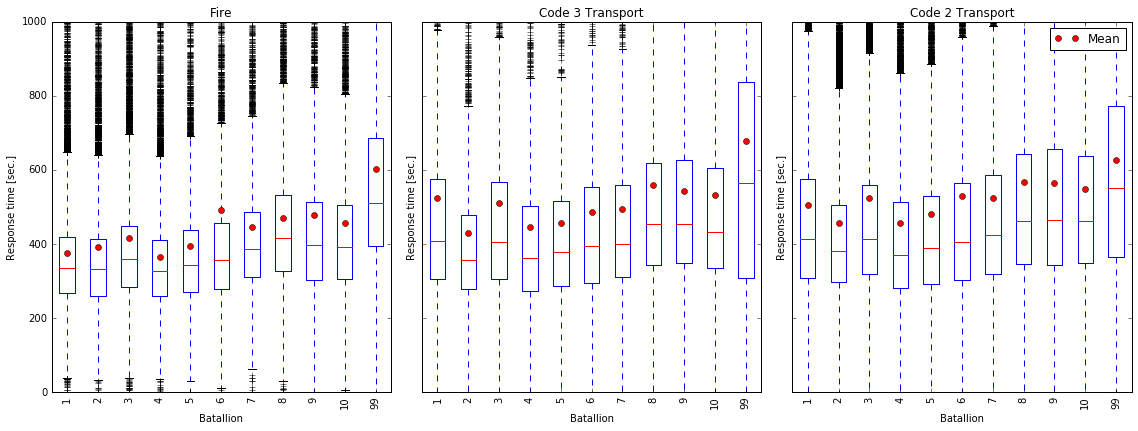

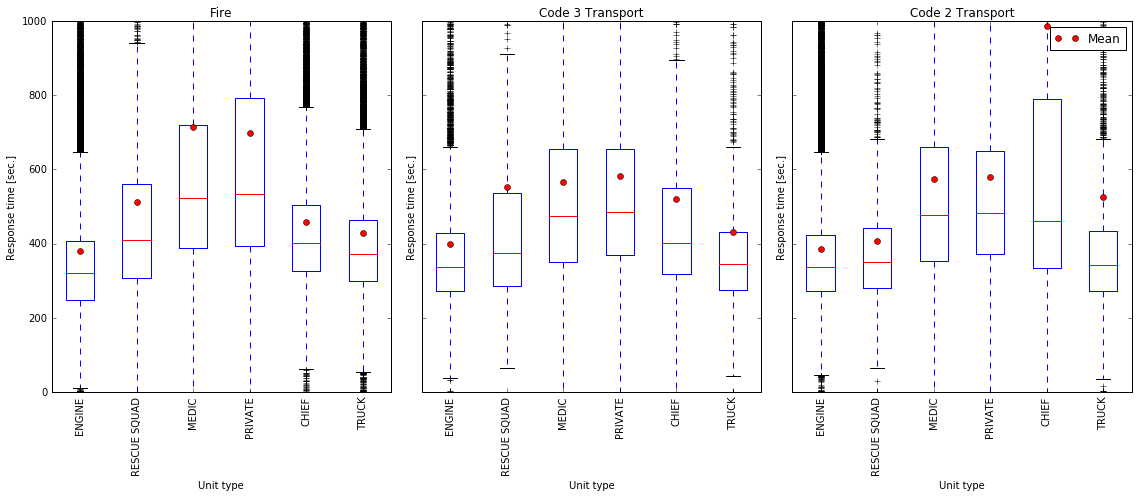

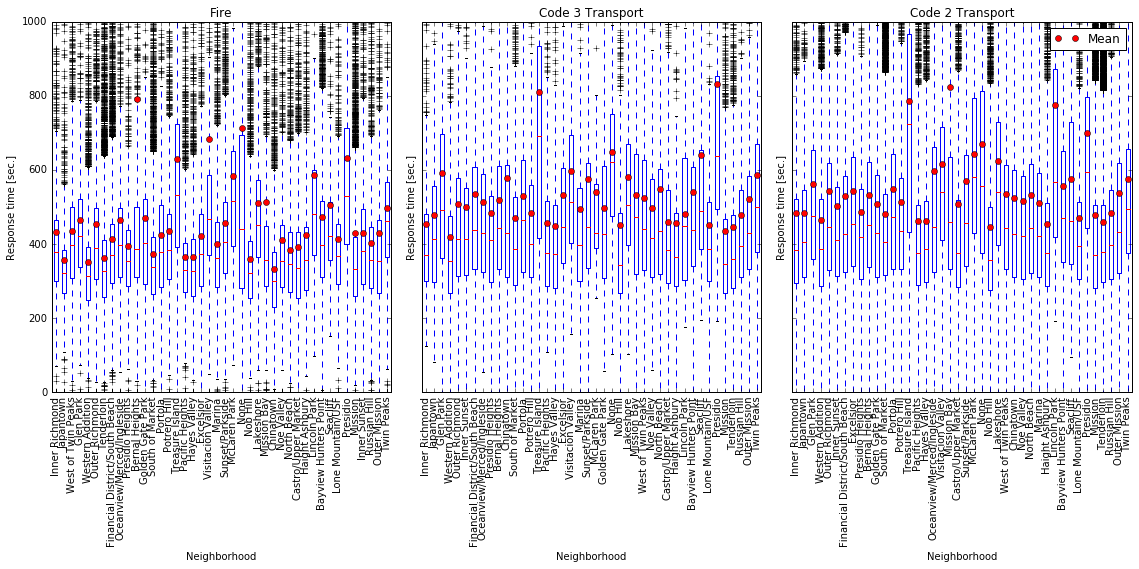

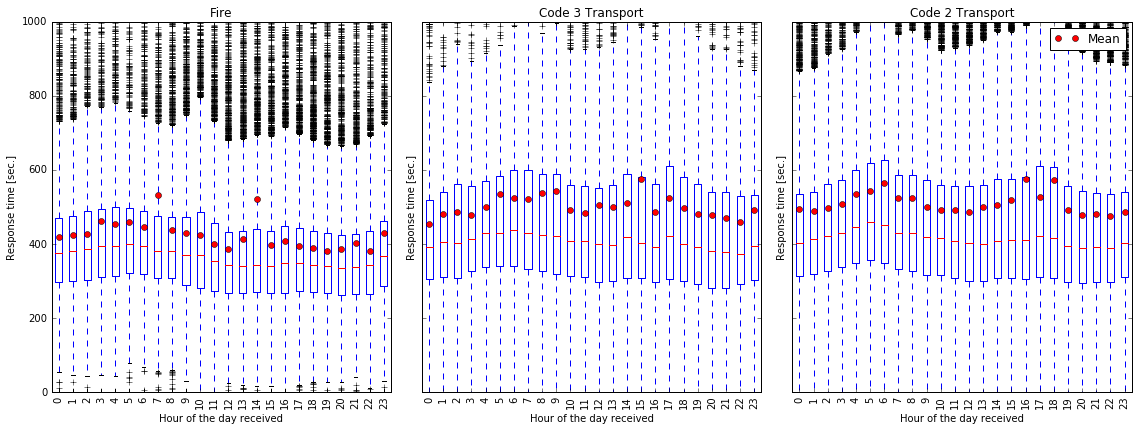

In [37]:
import cytoolz.curried as tlz
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# fig, ax = plt.subplots(2, sharex=True)
filter_final = tlz.filter(lambda x:x['FinalPriority'] == 3)
# filter_disposition = tlz.filter(lambda x:x['CallFinalDisposition'] == 'Code 3 Transport')
filter_arrives = tlz.filter(lambda x:x['DispatchToArrival'] != None)
filter_dispatched = tlz.filter(lambda x:x['EntryToDispatch'] != None)
filter_entered = tlz.filter(lambda x:x['InitiateToEntry'] != None)
groupings = {
    'Neighborhood':tlz.groupby(lambda x:x['NeighborhoodDistrict']),
    'Batallion': tlz.groupby(lambda x:x['Battalion']),
    'Hour of the day received': tlz.groupby(lambda x:x['ReceivedDtTm'].hour), # 'ReceivedDtTm': '09/05/2014 03:15:13 AM'
    'Unit type': tlz.groupby(lambda x:x['UnitType'])}

filter_dispositions = {'Fire':tlz.filter(lambda x:x['CallFinalDisposition'] == 'Fire'),
                      'Code 3 Transport':tlz.filter(lambda x:x['CallFinalDisposition'] == 'Code 3 Transport'),
                      'Code 2 Transport':tlz.filter(lambda x:x['CallFinalDisposition'] == 'Code 2 Transport')}
filter_unittype = tlz.filter(lambda x:x['UnitType'] not in ["ADMIN","SUPPORT","AIRPORT","INVESTIGATION","HOSPITAL","RESCUE CAPTAIN"])
for grouping_title,grouping in groupings.iteritems():
    fig, ax = plt.subplots(1,len(filter_dispositions),sharey=True)
    fig.set_size_inches(15.5, 5.5)
    fig.tight_layout(pad=0.4, w_pad=1.5, h_pad=12.0)
    it = 0
    for disposition,filter_disposition in filter_dispositions.iteritems():        
        vs = []
        stuff = grouping(filter_disposition(filter_unittype(filter_final(filter_entered(filter_dispatched(filter_arrives(data)))))))
        for group in stuff.values():
            vs.append([x['InitiateToEntry']+x['EntryToDispatch']+x['DispatchToArrival'] for x in group])
#         ax[it].plot([np.mean(x) for x in vs],'o',color='orange')
        bp = ax[it].boxplot(vs)
        ax[it].plot([0]+[np.mean(x) for x in vs],'o',color='red',label='Mean')
        ax[it].set_xticks(range(1,len(stuff.keys())+1))
        ax[it].set_xticklabels(stuff.keys(),rotation=90)
        ax[it].set_title(disposition)
        ax[it].set_ylabel("Response time [sec.]")
        ax[it].set_xlabel(grouping_title)
        ax[it].set_ylim(bottom=0,top=1000)
        if it == len(filter_dispositions)-1:
            ax[it].legend(loc="upper right")
        it = it+1
    plt.show()

# Theory

## Prediction using machine learning models

For the first task we will compare KNN and RandomForest models. The training period for both models is not long as for models such as ANN and both can be used for linear non-linear and classification problems. Our feature set is limited but we have a lot of data. KNN is one of the simplest models but can be very powerful, especially when the samples far outnumber the features such as in our case. We also chose Random Forest because we are uncertain about our feature set and many of the features we might try are related, such as neighborhood, station and battalion. and one of the benefits of random forest is that it´s practically impossible to overfit. It randomly samples both the samples and the feature set for a some prechosen number of trees. Then all the trees are asked and depending on the problem, a majory vote or the average of their results is used. A big reason we chose these two model was also the fact that running a dual layered cross-validation to select the best parameters for some set of models would take very long with all the data we had and we wanted instead to train models on as much data as possible, instead of the same data in different combinations and as we've mentioned the Random Forest model has sampling already in place and with so many samples we should be able to train a relatively good KNN model.

In the second task we will only be asking, will the dispatches within a given hour of the day be more or less than on average. Then we will train a logistic regression model first and use that as a baseline to compare KNN and Random Forest.

A thorough walkthrough of our Machine Learning Work can be found in the [Machine Learning Explorations](https://github.com/gretarg09/Dtu-SocialDataAnalysis-SFFireDepartment/blob/master/Notebook/Machine%20Learning%20Explorations.ipynb) notebook.

To train the models we split the 2016 data 80/20 into training and testing to begin with. In the first task we trained first regression models and then classification models, in the second we just trained classification models. For the regression models we used the mean squared error as a benchmark and we compared the result to guessing the mean of the training data. For the classification we used the classification rate or the % of correct classifications and the confusion matrix to measure the model preformance. In the second task we also used the precision and recall scores.

The results for our first task are somewhat expected. There are a lot of variables that could affect the response time. We've seen from the data that the response time varies a lot for many of the given variables we've explored but that does not mean that the reasons for abnomalies in the time to arrival correlate with or are captured by the variables in the dataset. 

We had no expectations for the second task. The results are alright, Logistic Regression manages a precision score of 0.772 and recall score of 0.892. It beats the most common by 9.5% and performs better than KNN and Random Forest.

These models were just to explore the potential predictive possibilities of the data-set. We did not find a very good model for the response time, even if it's slightly better it does not warrant the effort. But we have made an indicator that can indicate to some degree if the workload in the hour 24 hours in the future is going to be below average or not.

# Visualizations

## Explanation

The **first visualization** is a responsive histogram which shows the average response time for each neighborhood in San Francisco. When the 911 Dispatch Center receives an emergency phone call the call is assigned to one of the following groups; fire, alarm, potentially life threatening and non life threatening. All calls are therefore divided into these four main groups. The visualization allows the user to see the mean average response time per neighborhood for these four call type groups. The user can also see the overall average response time per neighborhood. The user can then see how the response time has changed over the years, more specifically from 2012 to 2017. This visualization provides a nice way for the user to see the difference in response time between neighborhoods. In addition to that the user can see how the response time has changed over the years.

The **second visualization** contains three different components that are all connected together.
- The <u>first component</u> is a responsive geo plot of the San Francisco area where each neighborhood is colored based on one of the following measures: neighborhood's average response time, average distance to responding fire station, ratio of late response time or ratio of very late response time. The late response time is defined as over 10 minutes and very late response time is defined as more than 20 minutes. These numbers are not chosen randomly, according to  this [article](http://www.sfgate.com/bayarea/article/Delays-compound-S-F-s-ambulance-crisis-5769934.php#photo-6891963) the city standard is that an ambulance should arrive at life-threatening emergencies within 10 minutes from when the call was received. The article also used 20 minutes as the standard for very late responses.
 
- The <u>second component</u> is a responsive histogram (under the geo plot) of the average response time for each hour of the day. This visualization allows the user to see how the response time changes over the day
    
- The <u>third component</u> of is a responsive stack histogram (on the right side of the geo plot) of the response time distribution. It shows the ratio of acceptable response times, ratio of late response times and ratio of very late response times.

By hovering over the geo plot the user can get further information about each neighborhood. The user can select the neighborhood by pressing on it, when chosen the neighborhood will fade in and out. When the user has chosen the neighborhood the stacked histogram on the right side and the "hour of the day" histogram under the geo plot will render information about the chosen neighborhood. The user can then toggle the periods button to see how the values have changed over the years. The user can un select the neighborhood by pressing on it again. When no neighborhood is selected the components two and three will render information about the whole San Francisco area.

**Note**

In the second visualisation we filtered out all non life threatening calls from the data set. Like one can see in the first visualization, seen [here](https://gretarg09.github.io/Dtu-SocialDataAnalysis-SFFireDepartment/responsetime.html), the difference in the average response time between the non life threatening group and the other three groups is significant. When a case/call is grouped as non life threatening the expected response time is nearly double the amount compared to the other three groups. In the second visualization we decided to focus on the remaining three groups; fire ,alarm, potentially life threatening because the importance of a quick response time in those calls is higher.  


## Purpose

Our goal was to analyse the response time of the Fire department of San Francisco. We wanted to investigate if the response time was neighborhood dependent (location dependent) or time dependent and if there was a difference between different types of calls e.g  alarm, fire, life threatening, non life threatening. 

The idea behind these visualizations is that the reader should be able to see quickly how the response time differs between neighborhoods in San Francisco and how it has evolved over the years. This was accomplished by the first visualization. 

We then wanted the user to see how the response time is distributed over the San Francisco area. We wanted the user to be able to see the difference geographically. This was accomplished by the second visualization. We then added additional information, like the fire stations and information about each neighborhood to give the reader the opportunity to put the response time into perspective. In addition to that the user can see how the response time changes over the hours of the day for each neighborhood in San Francisco and he can also see the ratio of late and very late response times for each neighborhood.



# Discussion 

Overall we enjoyed doing this project, we are satisfied with the visualization that we created and it was fun to utilize our machine learning skills on this data set. We found out some interesting things in the geographical distribution of the response time over the San Francisco area as well as increased average response time in 2014.

There are always some things that did not go as well as hoped for. We spent a lot of time trying to find a good data set that contains general information about the neighborhoods of San Francisco. In the end we used the City-Data.com website to create that data set like we have discussed earlier. We spent a lot of time trying to look for information in the dataset to improve the predictive power, came up with two variables but it was not enough to develop models with enough predictive capabilities for response time to warrant their existance. Finally we experimented a little with a python package called LIME that attempts to provide explanations for how a classifier classifies, it works even on the more black box classifiers such as Random Forest and ANN. The run time of the explanator was very long and we had to restart the notebook kernel if we wanted to run it on another model. Otherwise the results wouldn´t appear in the notebook.

In future works we could try out more sophisticated machine learning task, which are out of the scope of this course. We could also try to add additional data set like traffic statistics to further investigate the difference in response time between neighborhoods and we could analyse each neighborhood more in-depth to try to find out the reason why some neighborhoods have higher average response time than others, other than purely geographical. 